In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import numpy as np

def load_and_resize_doodles(input_folders, size=(28, 28)):
    X = []

    for input_folder in input_folders:
        for filename in os.listdir(input_folder):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                with Image.open(os.path.join(input_folder, filename)) as img:
                    # Convert to grayscale
                    img = img.convert('L')

                    # Resize the image
                    img_resized = img.resize(size, Image.LANCZOS)

                    # Convert image to numpy array and normalize
                    img_array = np.array(img_resized)
                    img_array[img_array == 255] = 0
                    img_array = img_array   # Normalize to [0, 1]

                    # Append to X
                    X.append(img_array)

                    print(f"Processed: {os.path.join(input_folder, filename)}")

    # Convert list to numpy array
    X = np.array(X)

    return X

# Usage
input_folders = [
    '/content/drive/MyDrive/Circles & Ellipses',
    '/content/drive/MyDrive/Rectangles & Rounded Rectangles',
    '/content/drive/MyDrive/Straight Lines',
    '/content/drive/MyDrive/Star',
    '/content/drive/MyDrive/Regular Polygons'
]

X = load_and_resize_doodles(input_folders)

print(f"X shape: {X.shape}")
print(f"Shape of each image: {X[0].shape}")

Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock8.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock4.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock20.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock6.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock2.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock5.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock19.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock3.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock7.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock18.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock13.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock11.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock1.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock15.png
Processed: /content/drive/My

In [ ]:
X[10].shape

(28, 28)

In [ ]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 251, 249,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 254,   0, 237, 214, 214,
        238,   0,   0, 254,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 254, 254, 216, 254,   0,
        208, 242,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 254, 254, 246, 226, 247, 223,
        200, 209, 216, 224, 253, 254,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 254,   0,   0,   0, 202, 200, 228,
        235, 236,   0, 233, 216,   0, 254,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 236, 226, 211, 212, 225, 188,
        222, 232, 235, 244, 231, 230,   0, 254,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 254, 254, 222, 203, 235, 229,   0, 247, 228,
        233, 251, 246, 230, 218, 202, 244,   0, 254,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 254,   0, 220, 229,   0,   0, 254, 254,   0, 232,
          0,   0,   0,   0, 249, 231, 204,   0, 254,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 254,   0, 238, 222,   0, 253, 254,   0, 254,   0, 232,
        249,   0,   0, 254, 254,   0, 239, 222,   0, 254,   0,   0,   0,
          0,   0],
       [  0,   0, 254,   0, 225, 242,   0,   0,   0,   0, 254,   0, 236,
        247,   0,   0,   0, 251, 224,   0, 208, 230,   0, 254,   0,   0,
          0,   0],
       [  0,   0, 254,   0, 220, 251, 252, 247,   0,   0, 254,   0, 240,
        235, 250, 251, 254, 244, 214, 251, 246, 201, 248,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 219, 254,   0, 254,   0,   0,   0,   0, 248,
        199, 214, 222, 222, 202, 219,   0,   0, 220, 224, 253,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 219, 253,   0,   0, 251, 254,   0,   0,   0,
        235, 252,   0,   0, 254,   0, 254,   0, 241, 214, 249,   0,   0,
          0,   0],
       [  0,   0, 254,   0, 223, 241,   0,   0, 245, 251,   0,   0,   0,
          0,   0, 254,   0,   0, 254,   0, 250, 251, 209, 245,   0, 254,
          0,   0],
       [  0,   0,   0,   0, 246, 219,   0, 254,   0,   0,   0,   0,   0,
        254,   0,   0,   0,   0, 254,   0, 248, 253, 212, 233,   0, 254,
          0,   0],
       [  0,   0,   0, 254,   0, 219, 245,   0, 254,   0,   0,   0,   0,
          0,   0, 254,   0,   0,   0,   0,   0,   0, 217, 229,   0, 254,
          0,   0],
       [  0,   0,   0,   0, 254, 246, 212, 249,   0, 254, 254,   0,   0,
          0,   0,   0,   0,   0, 245, 248, 254,   0, 213, 234,   0, 254,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 243, 211, 244,   0,   0,   0, 254,
        254, 248, 231,   0,   0, 243, 244, 254, 250, 198, 249,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254,   0, 249, 214, 222, 238, 252,   0,
          0,   0, 252,   0,   0,   0,   0,   0, 213, 222,   0, 254,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 254, 248, 221, 219, 206, 216, 221,
        232, 241, 249, 253,   0,   0,   0, 228, 201, 218, 234,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 245, 236, 251,   0,   0, 243,
        230, 224, 221, 219, 218, 220, 223, 212, 240, 229, 200, 237,   0,
        254,   0],
       [  0,   0,   0,   0,   0,   0,   

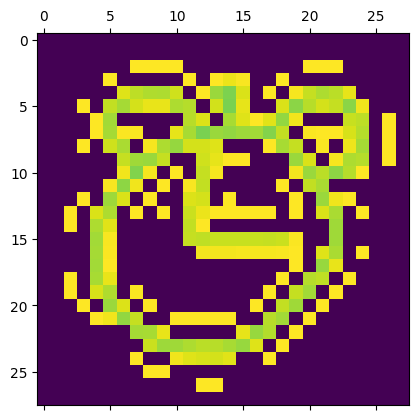

In [ ]:
plt.matshow(X[12])

In [ ]:
import numpy as np

y_train = np.concatenate([
    np.ones(441),
    np.full(205, 2),
    np.full(150, 3),
    np.full(116, 4),
    np.full(191, 5)
])

In [ ]:
y_train.shape

(1103,)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
indices = np.arange(len(y_train))
np.random.shuffle(indices)
X = X[indices]
y_train = y_train[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(394, 28, 28)

In [ ]:
y_train.shape

(394,)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(394, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
import keras
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1626 - loss: 2.1493      
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3712 - loss: 1.5337 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3729 - loss: 1.5109 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4098 - loss: 1.4415 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.4374 


In [ ]:
model.evaluate(X_test_flattened, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3250 - loss: 1.5621  


[1.5598475933074951, 0.3333333432674408]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([0.01153491, 0.74801755, 0.8499483 , 0.68443   , 0.6803448 ,
       0.63757145, 0.02660305, 0.01282852, 0.01167775, 0.068174  ],
      dtype=float32)

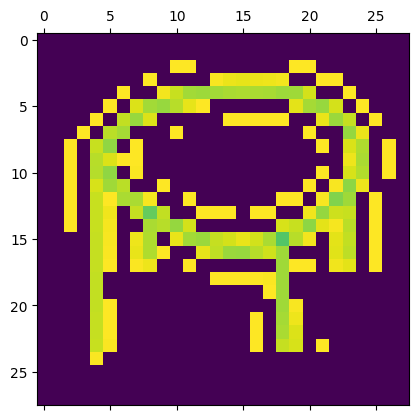

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:100]

[2,
 2,
 1,
 3,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 5,
 1,
 5,
 2,
 1,
 1,
 1,
 5,
 1,
 5,
 2,
 1]

In [ ]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1046 - loss: 3.0099
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1268 - loss: 2.5724
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2503 - loss: 2.3097
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2708 - loss: 2.1412
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2899 - loss: 2.1200
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3733 - loss: 1.8636
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4199 - loss: 1.7842
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4993 - loss: 1.6212
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5244 - loss: 1.5465
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5322 - loss: 1.4633
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6275 - loss: 1.2483
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6421 - lo

In [ ]:
model.evaluate(X_test_flattened,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3259 - loss: 2.2538  


[2.2033298015594482, 0.34343433380126953]